# Importing some utilities

In [1]:
import glob
import sys
sys.path.append('../python/')
from json2graph import jsonFile2graph
from graphUtils import plot_graph
from statsUtils import whichFitsBetter

# Loading $R_{II}$

In [2]:
import networkx as nx
import glob
import json
import os

files = glob.glob("../realGraphs/Ecore/R2/*.json")

Gs = []
for file in files:
    Gs.append(jsonFile2graph(file))

# RandomEMF

For each rule in RandomEMF, depending on the type of rule, we estimate its parameters. More concretely, for shapes we use the function `whichFitsBetter` that selects the best distribuntion by using maximum likeihood. For priorities in alternative rules, the procedure described in the paper is done and it is based on counting each different alternative in the set $R_{II}$.

## Number of classifiers

For the rule:

``` 
Package: EPackage ->
    eClassifiers += Classifier#Distribution(parameters);
```

(array([0.07679325, 0.06329114, 0.01434599, 0.00759494, 0.00506329,
        0.00253165, 0.00421941, 0.00337553, 0.00084388, 0.        ,
        0.0092827 , 0.00421941, 0.00084388, 0.00168776, 0.        ,
        0.        , 0.        , 0.00084388, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00084388, 0.00084388, 0.        , 0.00084388,
        0.00084388, 0.00168776, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195]),
 <a list of 39 Patch objects>)

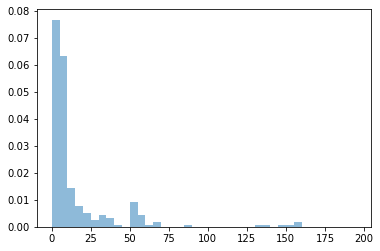

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def isClassifier(tp):
    if tp == 'EClass':
        return True
    if tp == 'EDataType':
        return True
    if tp == 'EEnum':
        return True
    return False

bins = np.arange(0, 200, 5)
numberClassifiers = [len([n for n in G if isClassifier(G.nodes[n]['type'])]) for G in Gs]
plt.hist(numberClassifiers, bins = bins, alpha=0.5, density = True)

In [4]:
whichFitsBetter(numberClassifiers)

Optimization terminated successfully.
         Current function value: 4.130096
         Iterations: 37
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 5.337392
         Iterations: 30
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 29.627922
         Iterations: 15
         Function evaluations: 30


{'dis': 'nbinom', 'params': (1.0, 0.02159552905612781)}

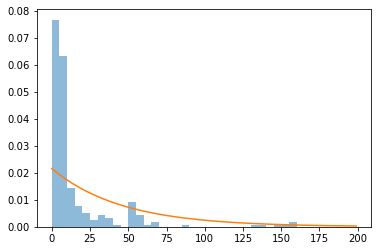

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import nbinom
from scipy.stats import norm


t = np.arange(0, 200, 1)
d = nbinom.pmf(t, 1.0, 0.02159, 0)

#np.exp(-np.mean(numberClassifiers))*np.power(np.mean(numberClassifiers), t)/factorial(t)
f = plt.figure()
plt.hist(numberClassifiers, bins = bins, alpha=0.5, density = True)
plt.plot(t, d, '-')
plt.show()

## Proportions of classifiers that a package has

For the rule:

``` 
alter Classifier : EClassifier ->
  	Enum#a | DataType#b |Class#c
  ;
```

In [6]:
import numpy as np
ps = []
for G in Gs:
    p = [0, 0, 0]
    for n in G[0]:
        if (G.nodes[n]['type'] == 'EClass'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'EDataType'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'EEnum'):
            p[2] = p[2] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/0.03663906)

[22.3517781   3.94149851  1.00000003]


## Number of eliterals

For the rule:

``` 
Enum : EEnum ->
  	eLiterals += Literal#Distribution(parameters);
  ;
```

In [7]:
numberEliterals = []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EEnum':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eLiterals'):
                        cont = cont + 1
            numberEliterals.append(cont)

mean 7.509345794392523
var 136.85738929164123


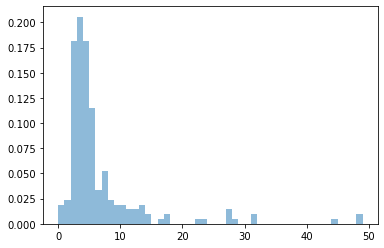

In [9]:
bins = np.arange(0, 50, 1)
plt.hist(numberEliterals, bins = bins, alpha=0.5, density = True)

print('mean',np.mean(numberEliterals))
print('var',np.var(numberEliterals))

In [10]:
whichFitsBetter(numberEliterals)

Optimization terminated successfully.
         Current function value: 3.074365
         Iterations: 39
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 3.878408
         Iterations: 26
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 6.428943
         Iterations: 13
         Function evaluations: 26


{'dis': 'nbinom', 'params': (1.0, 0.1349159836696457)}

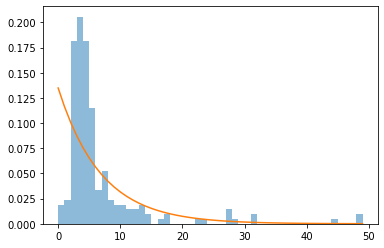

In [11]:
t = np.arange(0, 50, 1)
d = nbinom.pmf(t, 1, 0.1349, 0)

#np.exp(-np.mean(numberClassifiers))*np.power(np.mean(numberClassifiers), t)/factorial(t)
plt.hist(numberEliterals, bins = bins, alpha=0.5, density = True)
plt.plot(t, d, '-')
plt.show()

## Distribution Structural Features

For the rule:

``` 
Class: EClass ->
    eStructuralFeatures += Feature(self)#Distribution(parameters);
  ;
```

In [12]:
numberStrctFeat= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EClass':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eStructuralFeatures'):
                        cont = cont + 1
            numberStrctFeat.append(cont)

In [13]:
whichFitsBetter(numberStrctFeat)

Optimization terminated successfully.
         Current function value: 1.035971
         Iterations: 20
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 1.955236
         Iterations: 21
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: 1.474423
         Iterations: 10
         Function evaluations: 20


{'dis': 'poisson', 'params': 0.6878337147215866}

mean 0.6878337147215866
var 2.9229564818839124


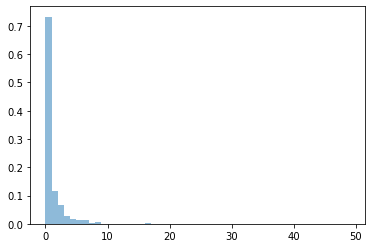

In [14]:
bins = np.arange(0, 50, 1)
plt.hist(numberStrctFeat, bins = bins, alpha=0.5, density = True)

print('mean',np.mean(numberStrctFeat))
print('var',np.var(numberStrctFeat))

## SuperTypes

For the rule:

``` 
Class: EClass ->
    eSuperTypes +=  Uniform(model.EClassifiers.filter[
      it instanceof org.eclipse.emf.ecore.EClass
    ].filter[!this.self.EAllSuperTypes.contains(it)].map[it as org.eclipse.emf.ecore.EClass])#Distribution(parameters);
  ;
```

In [15]:
superTypes= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EClass':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eSuperTypes'):
                        cont = cont + 1
                superTypes.append(cont)

0.636272040302267


In [16]:
whichFitsBetter(superTypes)

Optimization terminated successfully.
         Current function value: 0.989948
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 0.984867
         Iterations: 10
         Function evaluations: 20


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'poisson', 'params': 0.636272040302267}

## EAttributes vs EReferences

For the rule:

``` 
alter Feature (EClass c): EStructuralFeature ->  
     if (model.EClassifiers.filter[it instanceof EDataType].size > 0) Attribute#a |if (model.EClassifiers.filter[it instanceof org.eclipse.emf.ecore.EClass].size > 0)
     Reference(c)#b
  ;
```

Estimating `a` and `b`.

In [20]:
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'EAttribute'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'EReference'):
            p[1] = p[1] + 1
    p = np.array(p)
    if (np.sum(p) != 0):
        ps.append(p/np.sum(p))
    else:
        ps.append(p)
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[1.         4.52531963]


## EOpposite

For the rule:

``` 
Reference(EClass c):EReference ->
    eOpposite := if (UniformBool(a)) ReferenceOpp(self.EType as EClass,self,c)
  ; 
```

Estimating `a` by calculating the proportion of references that contain an opposite one.

In [21]:
opposite= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EReference':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eOpposite'):
                        cont = cont + 1
                opposite.append(cont)

In [22]:
len([n for n in opposite if n == 1])/len(opposite)

0.14899352983465133

# VIATRA and ALLOY, estimating the scope

For VIATRA and ALLOY, the distribution over the objects (i.e., $P(o)$) needs to be approximated. First, we calculate $\{o_1,\dots,o_n\}$ by counting the number of objects of each model in $R_{II}$.

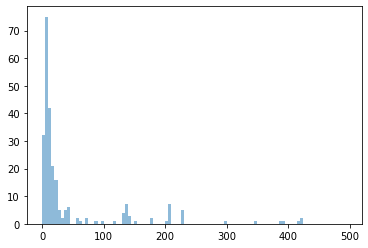

In [28]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, 500, 5)
numberObjects = [len([n for n in G]) for G in Gs]
hist = plt.hist(numberObjects, bins = bins, alpha=0.5)

We consider the KDE function:

$$\hat{f}_{h,K}(o)=\frac{1}{nh}\sum_{i=1}^nK\left(\frac{o-o_i}{h}\right).$$

Where $K \in \{\text{gaussian, tophat, linear}\}$ and $h\in \texttt{np.logspace(-2, -1, 20)}$. $K$ and $h$ are fixed using crossvalidation.

In [29]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

numberObjects = [[len([n for n in G])] for G in Gs]

params = {'bandwidth': np.logspace(-2, -1, 20),
         'kernel':['gaussian', 'tophat','linear']}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(np.array(numberObjects))
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
print("best kernel: {0}".format(grid.best_estimator_.kernel))

best bandwidth: 0.1
best kernel: gaussian


/home/antolin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


For VIATRA we sample 300 from $\hat{f}_{h,K}$.

In [30]:
kde = grid.best_estimator_
new_data = kde.sample(300, random_state=0)
new_data = new_data.reshape(-1)
new_data

array([  4.01565065,   7.0232181 ,   7.94026839, 139.97620783,
       228.85759391,   3.95066801,   5.94571385,  39.041605  ,
         4.88438176,  16.07811981,   4.14944845,   3.7930015 ,
        19.04262587,  13.0676908 ,   8.9362563 , 208.96027282,
       134.98671194,  36.97022091,   5.9690987 ,   4.83239962,
         6.11523316,  33.10796186,   9.91866357,   3.85335757,
         7.05210649,   3.9424212 ,  18.01419532,   6.96806716,
       205.06915388,  21.06947491,   7.92744026,  11.8616636 ,
       139.84170616,  19.06103794,   3.88111407,   4.94931836,
       133.9403686 ,   4.99474327,  16.80637202,   4.01887786,
        23.0523891 ,   6.00884221,   5.96891138,   7.00974002,
       205.03990463,   5.72274072, 116.19559123, 388.03900933,
         6.93475914, 422.96090466,  19.04937418,   5.98838961,
         6.79693155,   5.20644929, 115.98894593,   4.10201727,
       134.93079502,  10.15363771,  22.02863437,   8.06088438,
         3.89547466,  10.12111453,  17.06898182,   6.13

We check that the histogram samples are close to the original one:

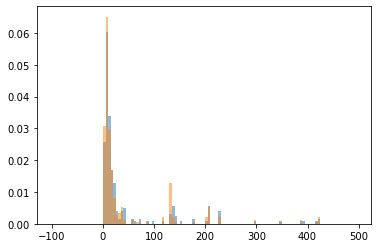

In [31]:
size_bin=5
bins = np.arange(-100, 500, size_bin)
numberObjects = [len([n for n in G]) for G in Gs]
hist = plt.hist(numberObjects, bins = bins, alpha=0.5,density=True)
plt.hist(new_data, bins = bins, alpha=0.5,density=True)
probs = hist[0]
probs = (probs/np.sum(probs))
objs = hist[1]

Finally, we generate the config files for VIATRA and ALLOY. These files are already provided together with the final and generated models. Therefore, you should not execute these code snippets. 

**Note**: For Alloy we generate more samples (400) since the generator fails more when it looks for a solution to the logic problem.

```
import numpy as np
import random
i = 0
for s in new_data:
    with open('../configurationFiles/Ecore/model.vsconfig', 'r') as file:
        data = file.read()
    x = data.replace("#node += 12..12", "#node += "+str(int(s)))
    x = x.replace("debug =\t\t\t\"outputs/debug\"","debug =\t\t\t\"outputs"+str(i)+"/debug\"")
    x = x.replace("log =\t\t\t\"outputs/log.txt\"","log =\t\t\t\"outputs"+str(i)+"/log.txt\"")
    x = x.replace("output =\t\t\"outputs/models\"","output =\t\t\"outputs"+str(i)+"/models\"")
    x = x.replace("runs = 400","runs = 1")
    with open("../configurationFiles/Ecore/VIATRA/smallEcoreGen"+str(i)+".vsconfig", "w") as text_file:
        text_file.write(x)
        i = i + 1
```

```
new_data = kde.sample(400, random_state=0)
new_data = new_data.reshape(-1)
new_data
i = 0
for s in new_data:
    if int(s)>30:
        print(s)
        continue
    with open('../configurationFiles/Ecore/modelAlloy.vsconfig', 'r') as file:
        data = file.read()
    x = data.replace("#node += 12..12", "#node += "+str(int(s)))
    x = x.replace("debug =\t\t\t\"outputs/debug\"","debug =\t\t\t\"outputs"+str(i)+"/debug\"")
    x = x.replace("log =\t\t\t\"outputs/log.txt\"","log =\t\t\t\"outputs"+str(i)+"/log.txt\"")
    x = x.replace("output =\t\t\"outputs/models\"","output =\t\t\"outputs"+str(i)+"/models\"")
    x = x.replace("ViatraSolver", "AlloySolver")
    with open("../configurationFiles/Ecore/ALLOY/smallEcoreGen"+str(i)+".vsconfig", "w") as text_file:
        text_file.write(x)
        i = i + 1
```

# RANDOM generator

We do thy same as the previous section but considering pairs $(o,d)$ where $o$ is the number of objects and $d$ is the average out degree.

In [32]:
deg_objects = [np.mean([G.out_degree(n) for n in G]) for G in Gs]
objects_deg = np.array(list(zip(numberObjects,deg_objects)))
objects_deg

array([[ 12.        ,   2.25      ],
       [  6.        ,   2.5       ],
       [ 19.        ,   3.26315789],
       [ 26.        ,   2.80769231],
       [  4.        ,   1.75      ],
       [135.        ,   2.82222222],
       [  7.        ,   2.        ],
       [  4.        ,   1.75      ],
       [ 41.        ,   2.80487805],
       [134.        ,   2.84328358],
       [ 11.        ,   3.        ],
       [  5.        ,   2.        ],
       [  5.        ,   1.8       ],
       [  5.        ,   2.4       ],
       [ 25.        ,   1.96      ],
       [  7.        ,   1.71428571],
       [893.        ,   1.99776036],
       [  9.        ,   2.33333333],
       [ 37.        ,   2.7027027 ],
       [  8.        ,   2.125     ],
       [141.        ,   2.80141844],
       [209.        ,   3.07177033],
       [ 12.        ,   2.66666667],
       [  9.        ,   2.88888889],
       [ 14.        ,   2.35714286],
       [  5.        ,   1.6       ],
       [229.        ,   3.16593886],
 

In [33]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
params = {'bandwidth': np.logspace(-2, -1, 20),
         'kernel':['gaussian', 'tophat']}
grid2 = GridSearchCV(KernelDensity(), params)
grid2.fit(objects_deg)
print("best bandwidth: {0}".format(grid2.best_estimator_.bandwidth))
print("best kernel: {0}".format(grid2.best_estimator_.kernel))

best bandwidth: 0.1
best kernel: gaussian


/home/antolin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


In [34]:
kde2 = grid2.best_estimator_
new_data2 = kde2.sample(300, random_state=0)

Now, using the new data generated (i.e., new pairs $(o,d)$), we call the RANDOM generator in order to generate the models. Doing something like this.

```
import numpy as np
import random
import subprocess
i = 0
for s in new_data2:
    subprocess.call(['java', '-jar', 'path to generator', 
                     '-m','path to metamodel',
                    '-f','-n','1','-s',str(s[0]),'-d',str(s[1]),'-o',
                     'path to output folder',
                    '-e',str(i)])
    i = i + 1
```

The generated models used to report the results in the paper are already provided.